In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import display
import matplotlib.ticker as mticker

In [2]:
# Read dataset
df=pd.read_csv('vcdb.csv', encoding='iso-8859-1', engine='python') #engine removes low memory message

In [3]:
pd.set_option('display.max_columns', None)
print(' No. rows:',df.shape[0],'\n','No. columns:', df.shape[1])
df.head(5)

 No. rows: 7833 
 No. columns: 2397


action.environmental.notes  action.environmental.variety.Deterioration  \
0                        NaN                                       False   
1                        NaN                                       False   
2                        NaN                                       False   
3                        NaN                                       False   
4                        NaN                                       False   

   action.environmental.variety.Earthquake  action.environmental.variety.EMI  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   

   action.environmental.variety.ESD  action.environmental.variety.Fire  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                              False   
4                             False                              False   

   action.environmental.variety.Flood  action.environmental.variety.Hazmat  \
0                               False                                False   
1                               False                                False   
2                               False                                False   
3                               False                                False   
4                               False                                False   

   action.environmental.variety.Humidity  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   action.environmental.variety.Hurricane  action.environmental.variety.Ice  \
0                                   False                             False   
1                                   False                             False   
2                                   False                             False   
3                                   False                             False   
4                                   False                             False   

   action.environmental.variety.Landslide  action.environmental.variety.Leak  \
0                                   False                              False   
1                                   False                              False   
2                                   False                              False   
3                                   False                              False   
4                                   False                              False   

   action.environmental.variety.Lightning  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   action.environmental.variety.Meteorite  action.environmental.variety.Other  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   

   action.environmental.variety.Particulates  \
0                                      False   
1                                      False   
2                          

##     Features to select:
## 1) Incident type (under 'action')
## 2) Incident date (under 'timeline')
## 3) Average employee count (under 'victim')
## 4) Possible asset info(revenue and loss) (under 'victim' and 'impact')


 ## Looking into incident type's information

In [4]:
# Identify features
col_names = list(df.columns)
col_names_1stword = [x.split('.')[0] for x in col_names]
col_names_1stword = set(col_names_1stword)
col_names_1stword

{'action',
 'actor',
 'asset',
 'attribute',
 'campaign_id',
 'confidence',
 'control_failure',
 'corrective_action',
 'cost_corrective_action',
 'discovery_method',
 'discovery_notes',
 'impact',
 'incident_id',
 'notes',
 'pattern',
 'plus',
 'reference',
 'schema_version',
 'security_incident',
 'source_id',
 'summary',
 'targeted',
 'timeline',
 'victim'}

In [5]:
# Incident type's information structure in dataframe
incident = df.loc[:,df.columns.str.startswith('action')]

In [6]:
print(incident.shape)

(7833, 276)


In [7]:
# Incident types: Environmental, Social, Hacking, Misuse, Malware, Physical, Error
incident

,action.environmental.notes,action.environmental.variety.Deterioration,action.environmental.variety.Earthquake,action.environmental.variety.EMI,action.environmental.variety.ESD,action.environmental.variety.Fire,action.environmental.variety.Flood,action.environmental.variety.Hazmat,action.environmental.variety.Humidity,action.environmental.variety.Hurricane,action.environmental.variety.Ice,action.environmental.variety.Landslide,action.environmental.variety.Leak,action.environmental.variety.Lightning,action.environmental.variety.Meteorite,action.environmental.variety.Other,action.environmental.variety.Particulates,action.environmental.variety.Pathogen,action.environmental.variety.Power failure,action.environmental.variety.Temperature,action.environmental.variety.Tornado,action.environmental.variety.Tsunami,action.environmental.variety.Unknown,action.environmental.variety.Vermin,action.environmental.variety.Volcano,action.environmental.variety.Wind,action.error.notes,action.error.variety.Capacity shortage,action.error.variety.Classification error,action.error.variety.Data entry error,action.error.variety.Disposal error,action.error.variety.Gaffe,action.error.variety.Loss,action.error.variety.Maintenance error,action.error.variety.Malfunction,action.error.variety.Misconfiguration,action.error.variety.Misdelivery,action.error.variety.Misinformation,action.error.variety.Omission,action.error.variety.Other,action.error.variety.Physical accidents,action.error.variety.Programming error,action.error.variety.Publishing error,action.error.variety.Unknown,action.error.vector.Carelessness,action.error.vector.Inadequate personnel,action.error.vector.Inadequate processes,action.error.vector.Inadequate technology,action.error.vector.Other,action.error.vector.Random error,action.error.vector.Unknown,action.hacking.cve,action.hacking.notes,action.hacking.result.Elevate,action.hacking.result.Exfiltrate,action.hacking.result.Infiltrate,action.hacking.variety.Abuse of functionality,action.hacking.variety.Brute force,action.hacking.variety.Buffer overflow,action.hacking.variety.Cache poisoning,action.hacking.variety.Cryptanalysis,action.hacking.variety.CSRF,action.hacking.variety.DoS,action.hacking.variety.Footprinting,action.hacking.variety.Forced browsing,action.hacking.variety.Format string attack,action.hacking.variety.Fuzz testing,action.hacking.variety.HTTP request smuggling,action.hacking.variety.HTTP request splitting,action.hacking.variety.HTTP response smuggling,action.hacking.variety.HTTP Response Splitting,action.hacking.variety.Integer overflows,action.hacking.variety.LDAP injection,action.hacking.variety.Mail command injection,action.hacking.variety.MitM,action.hacking.variety.Null byte injection,action.hacking.variety.Offline cracking,action.hacking.variety.OS commanding,action.hacking.variety.Other,action.hacking.variety.Pass-the-hash,action.hacking.variety.Path traversal,action.hacking.variety.Reverse engineering,action.hacking.variety.RFI,action.hacking.variety.Routing detour,action.hacking.variety.Session fixation,action.hacking.variety.Session prediction,action.hacking.variety.Session replay,action.hacking.variety.Soap array abuse,action.hacking.variety.Special element injection,action.hacking.variety.SQLi,action.hacking.variety.SSI injection,action.hacking.variety.Unknown,action.hacking.variety.URL redirector abuse,action.hacking.variety.Use of backdoor or C2,action.hacking.variety.Use of stolen creds,action.hacking.variety.Virtual machine escape,action.hacking.variety.XML attribute blowup,action.hacking.variety.XML entity expansion,action.hacking.variety.XML external entities,action.hacking.variety.XML injection,action.hacking.variety.XPath injection,action.hacking.variety.XQuery injection,action.hacking.variety.XSS,action.hacking.vector.3rd party desktop,action.hacking.vector.Backdoor or C2,action.hacking.vector.Command shell,action.hacking.vector.Desktop sharing,action.hacking.vector.Desktop sharing software,action.hacking.ve

In [8]:
incident_type = [x.split('.')[1] for x in incident.columns]
incident_type = set(incident_type)
incident_type

{'Environmental',
 'Error',
 'Hacking',
 'Malware',
 'Misuse',
 'Physical',
 'Social',
 'Unknown',
 'environmental',
 'error',
 'hacking',
 'malware',
 'misuse',
 'physical',
 'social',
 'unknown'}

In [9]:
incident_subtype = df.loc[:,df.columns.str.startswith('action.social')]
set(incident_subtype)

{'action.social.notes',
 'action.social.result.Elevate',
 'action.social.result.Exfiltrate',
 'action.social.result.Infiltrate',
 'action.social.target.Auditor',
 'action.social.target.Call center',
 'action.social.target.Cashier',
 'action.social.target.Customer',
 'action.social.target.Developer',
 'action.social.target.End-user',
 'action.social.target.Executive',
 'action.social.target.Finance',
 'action.social.target.Former employee',
 'action.social.target.Guard',
 'action.social.target.Helpdesk',
 'action.social.target.Human resources',
 'action.social.target.Maintenance',
 'action.social.target.Manager',
 'action.social.target.Other',
 'action.social.target.Partner',
 'action.social.target.System admin',
 'action.social.target.Unknown',
 'action.social.variety.Baiting',
 'action.social.variety.Bribery',
 'action.social.variety.Elicitation',
 'action.social.variety.Extortion',
 'action.social.variety.Forgery',
 'action.social.variety.Influence',
 'action.social.variety.Other',
 

## Select features and preprocess

In [10]:
# No. Employee
numberEmployee = df.loc[:,df.columns.str.startswith('victim.employee_count')]

# Company's Revenue
annualRevenue = df.loc[:,df.columns.str.startswith('victim.revenue')]

# Type of Attack
# Select only .variety which states the type of attack
incidentMalware = df.loc[:,df.columns.str.startswith('action.malware.variety')]  

incidentHack = df.loc[:,df.columns.str.startswith('action.hacking.variety')]  

incidentSocial = df.loc[:,df.columns.str.startswith('action.social.variety')]

incidentMisuse = df.loc[:,df.columns.str.startswith('action.misuse.variety')]

incidentPhysical = df.loc[:,df.columns.str.startswith('action.physical.variety')]

incidentError = df.loc[:,df.columns.str.startswith('action.error.variety')]

incidentEnv = df.loc[:,df.columns.str.startswith('action.environmental.variety')]


# Year of incident
incidentYear = df.loc[:,df.columns.str.startswith('timeline.incident.year')]

# How much financial damage caused
impactLoss = df.loc[:,df.columns.str.startswith('impact.overall_amount')]
lossCurrency = df.loc[:,df.columns.str.startswith('impact.iso_currency_code')]


In [11]:
# Combining the features

df_new_features = pd.concat([numberEmployee,annualRevenue,impactLoss,lossCurrency,incidentMalware,
                             incidentHack,incidentSocial,incidentMisuse,
                             incidentPhysical,incidentError,incidentEnv,incidentYear],axis=1)
df_new_features.shape

(7833, 497)

## Revenue

In [12]:
set(df_new_features.loc[:,df_new_features.columns.str.startswith('victim.revenue')])

{'victim.revenue.amount',
 'victim.revenue.iso_currency_code.AED',
 'victim.revenue.iso_currency_code.AFN',
 'victim.revenue.iso_currency_code.ALL',
 'victim.revenue.iso_currency_code.AMD',
 'victim.revenue.iso_currency_code.ANG',
 'victim.revenue.iso_currency_code.AOA',
 'victim.revenue.iso_currency_code.ARS',
 'victim.revenue.iso_currency_code.AUD',
 'victim.revenue.iso_currency_code.AWG',
 'victim.revenue.iso_currency_code.AZN',
 'victim.revenue.iso_currency_code.BAM',
 'victim.revenue.iso_currency_code.BBD',
 'victim.revenue.iso_currency_code.BDT',
 'victim.revenue.iso_currency_code.BGN',
 'victim.revenue.iso_currency_code.BHD',
 'victim.revenue.iso_currency_code.BIF',
 'victim.revenue.iso_currency_code.BMD',
 'victim.revenue.iso_currency_code.BND',
 'victim.revenue.iso_currency_code.BOB',
 'victim.revenue.iso_currency_code.BRL',
 'victim.revenue.iso_currency_code.BSD',
 'victim.revenue.iso_currency_code.BTN',
 'victim.revenue.iso_currency_code.BWP',
 'victim.revenue.iso_currency_c

In [13]:
# Check for currencies present
revenue_currency = df_new_features.loc[:,df_new_features.columns.str.startswith('victim.revenue.iso')]
revenue_currency = revenue_currency.astype('int')

curr_list = []
for col in revenue_currency.columns:
    for val in revenue_currency[col]:
        if val==1:
            curr_list.append(col.split('.')[-1])
            continue
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
set(curr_list)

{'GBP', 'USD'}

In [14]:
# Create a new column to convert all revenue entries to USD

# Select currencies that contain entries
revenue_df = annualRevenue[['victim.revenue.amount','victim.revenue.iso_currency_code.GBP'
                             ,'victim.revenue.iso_currency_code.USD']]

revenue_df['Revenue (USD)']=pd.Series(dtype='float')

for col in [col for col in revenue_df]:
    if col.split('.')[-1]=='GBP':
        revenue_df.loc[revenue_df[col]==True,'Revenue (USD)']=revenue_df['victim.revenue.amount']*1.23
    elif col.split('.')[-1]=='USD':
        revenue_df.loc[revenue_df[col]==True,'Revenue (USD)']=revenue_df['victim.revenue.amount']

C:\Users\ayfoo\AppData\Local\Temp/ipykernel_2544/401382363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['Revenue (USD)']=pd.Series(dtype='float')
C:\Users\ayfoo\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
# No. of rows with revenues
revenue_df['Revenue (USD)'].notnull().sum()

505

## Employee count

In [16]:
numberEmployee

,victim.employee_count.1 to 10,victim.employee_count.10001 to 25000,victim.employee_count.1001 to 10000,victim.employee_count.101 to 1000,victim.employee_count.11 to 100,victim.employee_count.25001 to 50000,victim.employee_count.50001 to 100000,victim.employee_count.Large,victim.employee_count.Over 100000,victim.employee_count.Small,victim.employee_count.Unknown
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7828,False,False,False,True,False,False,False,False,False,False,False
7829,False,False,False,False,False,False,False,False,False,False,True
7830,True,False,False,False,False,False,False,False,False,False,False
7831,False,False,False,False,False,False,False,False,False,False,True


In [17]:
# Create a series for emp count after getting average count

avg_emp_count = []

for i in range(len(numberEmployee)):
    if numberEmployee.loc[i,'victim.employee_count.1 to 10']==True:
        avg_emp_count.append(10)
        
    elif numberEmployee.loc[i,'victim.employee_count.11 to 100']==True:
        avg_emp_count.append(50)
        
    elif numberEmployee.loc[i,'victim.employee_count.101 to 1000'] == True:
         avg_emp_count.append(500)
            
    elif numberEmployee.loc[i,'victim.employee_count.1001 to 10000'] == True:
         avg_emp_count.append(5000)
            
    elif numberEmployee.loc[i,'victim.employee_count.10001 to 25000'] == True:
         avg_emp_count.append(17500)
            
    elif numberEmployee.loc[i,'victim.employee_count.25001 to 50000'] == True:
         avg_emp_count.append(37500)
            
    elif numberEmployee.loc[i,'victim.employee_count.50001 to 100000'] == True:
         avg_emp_count.append(75000)
            
    elif numberEmployee.loc[i,'victim.employee_count.Over 100000'] == True:
         avg_emp_count.append(100000)
    else:
        avg_emp_count.append(0)
        
            
avg_emp_series = pd.Series(avg_emp_count)
avg_emp_series.value_counts()

0         3199
5000      1058
100000    1002
500        835
50         675
10         414
17500      374
37500      169
75000      107
dtype: int64

## Incident type

In [18]:
df_incident = df.loc[:,df.columns.str.startswith('action.')]
df_incident

,action.environmental.notes,action.environmental.variety.Deterioration,action.environmental.variety.Earthquake,action.environmental.variety.EMI,action.environmental.variety.ESD,action.environmental.variety.Fire,action.environmental.variety.Flood,action.environmental.variety.Hazmat,action.environmental.variety.Humidity,action.environmental.variety.Hurricane,action.environmental.variety.Ice,action.environmental.variety.Landslide,action.environmental.variety.Leak,action.environmental.variety.Lightning,action.environmental.variety.Meteorite,action.environmental.variety.Other,action.environmental.variety.Particulates,action.environmental.variety.Pathogen,action.environmental.variety.Power failure,action.environmental.variety.Temperature,action.environmental.variety.Tornado,action.environmental.variety.Tsunami,action.environmental.variety.Unknown,action.environmental.variety.Vermin,action.environmental.variety.Volcano,action.environmental.variety.Wind,action.error.notes,action.error.variety.Capacity shortage,action.error.variety.Classification error,action.error.variety.Data entry error,action.error.variety.Disposal error,action.error.variety.Gaffe,action.error.variety.Loss,action.error.variety.Maintenance error,action.error.variety.Malfunction,action.error.variety.Misconfiguration,action.error.variety.Misdelivery,action.error.variety.Misinformation,action.error.variety.Omission,action.error.variety.Other,action.error.variety.Physical accidents,action.error.variety.Programming error,action.error.variety.Publishing error,action.error.variety.Unknown,action.error.vector.Carelessness,action.error.vector.Inadequate personnel,action.error.vector.Inadequate processes,action.error.vector.Inadequate technology,action.error.vector.Other,action.error.vector.Random error,action.error.vector.Unknown,action.hacking.cve,action.hacking.notes,action.hacking.result.Elevate,action.hacking.result.Exfiltrate,action.hacking.result.Infiltrate,action.hacking.variety.Abuse of functionality,action.hacking.variety.Brute force,action.hacking.variety.Buffer overflow,action.hacking.variety.Cache poisoning,action.hacking.variety.Cryptanalysis,action.hacking.variety.CSRF,action.hacking.variety.DoS,action.hacking.variety.Footprinting,action.hacking.variety.Forced browsing,action.hacking.variety.Format string attack,action.hacking.variety.Fuzz testing,action.hacking.variety.HTTP request smuggling,action.hacking.variety.HTTP request splitting,action.hacking.variety.HTTP response smuggling,action.hacking.variety.HTTP Response Splitting,action.hacking.variety.Integer overflows,action.hacking.variety.LDAP injection,action.hacking.variety.Mail command injection,action.hacking.variety.MitM,action.hacking.variety.Null byte injection,action.hacking.variety.Offline cracking,action.hacking.variety.OS commanding,action.hacking.variety.Other,action.hacking.variety.Pass-the-hash,action.hacking.variety.Path traversal,action.hacking.variety.Reverse engineering,action.hacking.variety.RFI,action.hacking.variety.Routing detour,action.hacking.variety.Session fixation,action.hacking.variety.Session prediction,action.hacking.variety.Session replay,action.hacking.variety.Soap array abuse,action.hacking.variety.Special element injection,action.hacking.variety.SQLi,action.hacking.variety.SSI injection,action.hacking.variety.Unknown,action.hacking.variety.URL redirector abuse,action.hacking.variety.Use of backdoor or C2,action.hacking.variety.Use of stolen creds,action.hacking.variety.Virtual machine escape,action.hacking.variety.XML attribute blowup,action.hacking.variety.XML entity expansion,action.hacking.variety.XML external entities,action.hacking.variety.XML injection,action.hacking.variety.XPath injection,action.hacking.variety.XQuery injection,action.hacking.variety.XSS,action.hacking.vector.3rd party desktop,action.hacking.vector.Backdoor or C2,action.hacking.vector.Command shell,action.hacking.vector.Desktop sharing,action.hacking.vector.Desktop sharing software,action.hacking.ve

In [19]:
df_incident['Incident Type'] = pd.Series()

# Assigning incident type
for col in [col for col in incidentMalware]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Malware'

for col in [col for col in incidentHack]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Hacking'
    
for col in [col for col in incidentSocial]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Social'
    
for col in [col for col in incidentMisuse]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Misuse'
    
for col in [col for col in incidentError]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Error'
    
for col in [col for col in incidentEnv]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Environment'
    
for col in [col for col in incidentPhysical]:
    df_incident.loc[df_incident[col] == True, 'Incident Type'] = 'Physical'

C:\Users\ayfoo\AppData\Local\Temp/ipykernel_2544/274033631.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_incident['Incident Type'] = pd.Series()
C:\Users\ayfoo\AppData\Local\Temp/ipykernel_2544/274033631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incident['Incident Type'] = pd.Series()
C:\Users\ayfoo\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [20]:
df_incident['Incident Type'].value_counts()

Error          2233
Hacking        1747
Physical       1517
Misuse         1496
Social          424
Malware         198
Environment       8
Name: Incident Type, dtype: int64

In [21]:
# Convert to series
incident_series = df_incident['Incident Type'].squeeze()

## Year of incident

In [22]:
# Year of incident
incidentYear = incidentYear.astype('int')

# Convert to series
incident_year_series =incidentYear.squeeze()


## Asset loss

In [23]:
set(impactLoss)

{'impact.overall_amount'}

In [24]:
set(lossCurrency)

{'impact.iso_currency_code.AED',
 'impact.iso_currency_code.AFN',
 'impact.iso_currency_code.ALL',
 'impact.iso_currency_code.AMD',
 'impact.iso_currency_code.ANG',
 'impact.iso_currency_code.AOA',
 'impact.iso_currency_code.ARS',
 'impact.iso_currency_code.AUD',
 'impact.iso_currency_code.AWG',
 'impact.iso_currency_code.AZN',
 'impact.iso_currency_code.BAM',
 'impact.iso_currency_code.BBD',
 'impact.iso_currency_code.BDT',
 'impact.iso_currency_code.BGN',
 'impact.iso_currency_code.BHD',
 'impact.iso_currency_code.BIF',
 'impact.iso_currency_code.BMD',
 'impact.iso_currency_code.BND',
 'impact.iso_currency_code.BOB',
 'impact.iso_currency_code.BRL',
 'impact.iso_currency_code.BSD',
 'impact.iso_currency_code.BTN',
 'impact.iso_currency_code.BWP',
 'impact.iso_currency_code.BYR',
 'impact.iso_currency_code.BZD',
 'impact.iso_currency_code.CAD',
 'impact.iso_currency_code.CDF',
 'impact.iso_currency_code.CHF',
 'impact.iso_currency_code.CLP',
 'impact.iso_currency_code.CNY',
 'impact.i

In [25]:
asset_loss = pd.concat([impactLoss,lossCurrency],axis=1)
asset_loss

,impact.overall_amount,impact.iso_currency_code.AED,impact.iso_currency_code.AFN,impact.iso_currency_code.ALL,impact.iso_currency_code.AMD,impact.iso_currency_code.ANG,impact.iso_currency_code.AOA,impact.iso_currency_code.ARS,impact.iso_currency_code.AUD,impact.iso_currency_code.AWG,impact.iso_currency_code.AZN,impact.iso_currency_code.BAM,impact.iso_currency_code.BBD,impact.iso_currency_code.BDT,impact.iso_currency_code.BGN,impact.iso_currency_code.BHD,impact.iso_currency_code.BIF,impact.iso_currency_code.BMD,impact.iso_currency_code.BND,impact.iso_currency_code.BOB,impact.iso_currency_code.BRL,impact.iso_currency_code.BSD,impact.iso_currency_code.BTN,impact.iso_currency_code.BWP,impact.iso_currency_code.BYR,impact.iso_currency_code.BZD,impact.iso_currency_code.CAD,impact.iso_currency_code.CDF,impact.iso_currency_code.CHF,impact.iso_currency_code.CLP,impact.iso_currency_code.CNY,impact.iso_currency_code.COP,impact.iso_currency_code.CRC,impact.iso_currency_code.CUC,impact.iso_currency_code.CUP,impact.iso_currency_code.CVE,impact.iso_currency_code.CZK,impact.iso_currency_code.DJF,impact.iso_currency_code.DKK,impact.iso_currency_code.DOP,impact.iso_currency_code.DZD,impact.iso_currency_code.EGP,impact.iso_currency_code.ERN,impact.iso_currency_code.ETB,impact.iso_currency_code.EUR,impact.iso_currency_code.FJD,impact.iso_currency_code.FKP,impact.iso_currency_code.GBP,impact.iso_currency_code.GEL,impact.iso_currency_code.GGP,impact.iso_currency_code.GHS,impact.iso_currency_code.GIP,impact.iso_currency_code.GMD,impact.iso_currency_code.GNF,impact.iso_currency_code.GTQ,impact.iso_currency_code.GYD,impact.iso_currency_code.HKD,impact.iso_currency_code.HNL,impact.iso_currency_code.HRK,impact.iso_currency_code.HTG,impact.iso_currency_code.HUF,impact.iso_currency_code.IDR,impact.iso_currency_code.ILS,impact.iso_currency_code.IMP,impact.iso_currency_code.INR,impact.iso_currency_code.IQD,impact.iso_currency_code.IRR,impact.iso_currency_code.ISK,impact.iso_currency_code.JEP,impact.iso_currency_code.JMD,impact.iso_currency_code.JOD,impact.iso_currency_code.JPY,impact.iso_currency_code.KES,impact.iso_currency_code.KGS,impact.iso_currency_code.KHR,impact.iso_currency_code.KMF,impact.iso_currency_code.KPW,impact.iso_currency_code.KRW,impact.iso_currency_code.KWD,impact.iso_currency_code.KYD,impact.iso_currency_code.KZT,impact.iso_currency_code.LAK,impact.iso_currency_code.LBP,impact.iso_currency_code.LKR,impact.iso_currency_code.LRD,impact.iso_currency_code.LSL,impact.iso_currency_code.LTL,impact.iso_currency_code.LVL,impact.iso_currency_code.LYD,impact.iso_currency_code.MAD,impact.iso_currency_code.MDL,impact.iso_currency_code.MGA,impact.iso_currency_code.MKD,impact.iso_currency_code.MMK,impact.iso_currency_code.MNT,impact.iso_currency_code.MOP,impact.iso_currency_code.MRO,impact.iso_currency_code.MUR,impact.iso_currency_code.MVR,impact.iso_currency_code.MWK,impact.iso_currency_code.MXN,impact.iso_currency_code.MYR,impact.iso_currency_code.MZN,impact.iso_currency_code.NAD,impact.iso_currency_code.NGN,impact.iso_currency_code.NIO,impact.iso_currency_code.NOK,impact.iso_currency_code.NPR,impact.iso_currency_code.NZD,impact.iso_currency_code.OMR,impact.iso_currency_code.PAB,impact.iso_currency_code.PEN,impact.iso_currency_code.PGK,impact.iso_currency_code.PHP,impact.iso_currency_code.PKR,impact.iso_currency_code.PLN,impact.iso_currency_code.PYG,impact.iso_currency_code.QAR,impact.iso_currency_code.RON,impact.iso_currency_code.RSD,impact.iso_currency_code.RUB,impact.iso_currency_code.RWF,impact.iso_currency_code.SAR,impact.iso_currency_code.SBD,impact.iso_currency_code.SCR,impact.iso_currency_code.SDG,impact.iso_currency_code.SEK,impact.iso_currency_code.SGD,impact.iso_currency_code.SHP,impact.iso_currency_code.SLL,impact.iso_currency_code.SOS,impact.iso_currency_code.SPL,impact.iso_currency_code.SRD,impact.iso_currency_code.STD,impact.iso_currency_code.SVC,impact.iso_currency_code.SYP,impact.iso_currency_code.SZL,impact.iso_currency_code.THB,impa

In [26]:
# Check for present currencies
lossCurrency = lossCurrency.astype('int')

loss_curr_list = []
for col in lossCurrency.columns:
    for val in lossCurrency[col]:
        if val==1:
            loss_curr_list.append(col.split('.')[-1])
            continue
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
set(loss_curr_list)

{'AUD', 'CAD', 'CZK', 'EUR', 'GBP', 'INR', 'KRW', 'THB', 'USD', 'ZAR'}

In [27]:
# Create new column to calculate any asset loss in USD

asset_loss['Asset loss in USD'] = pd.Series()

for col in [col for col in asset_loss]:
    if col.split('.')[-1]=='AUD':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.7
        
    elif col.split('.')[-1]=='CAD':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.77
        
    elif col.split('.')[-1]=='CZK':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.043
        
    elif col.split('.')[-1]=='EUR':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*1.05
        
    elif col.split('.')[-1]=='GBP':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*1.23
        
    elif col.split('.')[-1]=='INR':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.013
        
    elif col.split('.')[-1]=='KRW':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.013
        
    elif col.split('.')[-1]=='THB':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.013
        
    elif col.split('.')[-1]=='USD':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']
        
    elif col.split('.')[-1]=='ZAR':
        asset_loss.loc[asset_loss[col]==True,'Asset loss in USD'] = asset_loss['impact.overall_amount']*0.063

C:\Users\ayfoo\AppData\Local\Temp/ipykernel_2544/4207228980.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  asset_loss['Asset loss in USD'] = pd.Series()


In [28]:
asset_loss['Asset loss in USD'].notna().sum()

38

## Combined final dataframe

In [29]:
combined_df = pd.concat([revenue_df['Revenue (USD)'],avg_emp_series,incident_series,incident_year_series
                        ,asset_loss['Asset loss in USD']],axis=1)

In [30]:
combined_df.rename(columns={0:'Avg Employee Count','timeline.incident.year'
                           :'Year'},inplace=True)
combined_df

,Revenue (USD),Avg Employee Count,Incident Type,Year,Asset loss in USD
0,NaN,100000,Misuse,2010,NaN
1,NaN,500,Physical,2014,NaN
2,NaN,5000,Error,2014,NaN
3,NaN,0,Hacking,2012,NaN
4,NaN,100000,Error,2014,NaN
...,...,...,...,...,...
7828,NaN,500,Hacking,2016,NaN
7829,NaN,0,Error,2014,NaN
7830,NaN,10,Misuse,2013,NaN
7831,NaN,0,Physical,2012,NaN


In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Revenue (USD)       505 non-null    float64
 1   Avg Employee Count  7833 non-null   int64  
 2   Incident Type       7623 non-null   object 
 3   Year                7833 non-null   int32  
 4   Asset loss in USD   38 non-null     float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 275.5+ KB


## Exploratory Analysis

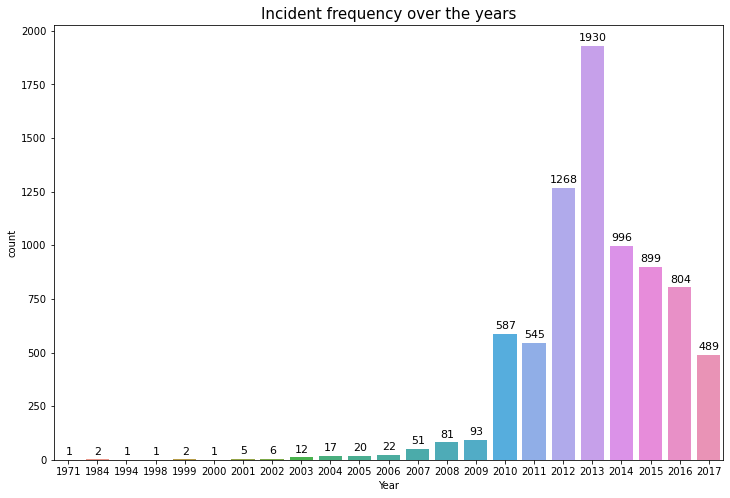

In [32]:
# Plot incident occurences per year
f, ax = plt.subplots(figsize=(12,8))
combined_df['Year'] = sorted(combined_df['Year'])
ax = sb.countplot(x=combined_df['Year'])
ax.set_title('Incident frequency over the years',fontsize=15)
for p in ax.patches:
    ax.annotate(int(p.get_height()),((p.get_x() + p.get_width()), p.get_height()), xytext=(-11, 5),fontsize=11,textcoords='offset pixels', horizontalalignment='center')

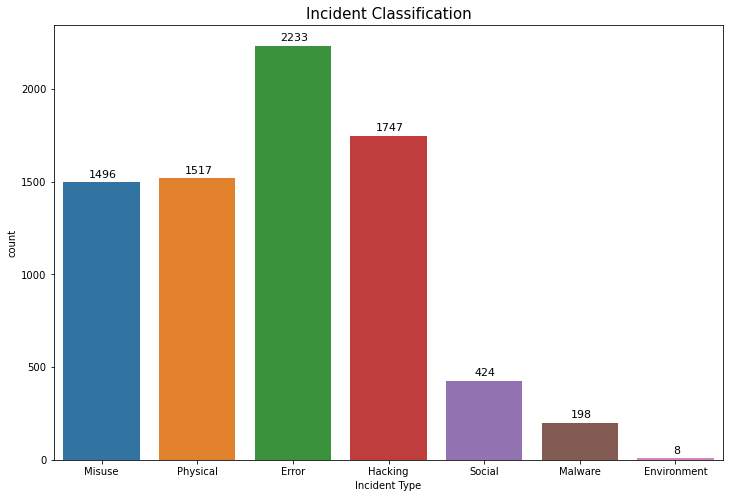

In [33]:
# Plot incident category distribution

f, ax=plt.subplots(figsize=(12,8))
ax=sb.countplot(x=combined_df['Incident Type'])
ax.set_title('Incident Classification',fontsize=15)

for p in ax.patches:
    ax.annotate(int(p.get_height()),((p.get_x() + p.get_width()), p.get_height()), xytext=(-37, 5),fontsize=11,textcoords='offset pixels', horizontalalignment='center')

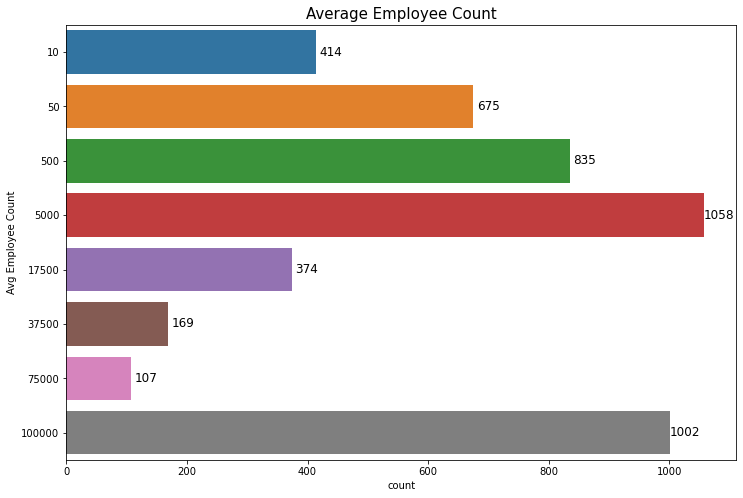

In [34]:
# Plot average employee count

empCount=combined_df['Avg Employee Count']
empCount=empCount[empCount != 0] # Remove no. of employee count = 0
#empCount.dropna(inplace=True)

f, ax=plt.subplots(figsize=(12,8))
ax=sb.countplot(y=empCount)
ax.set_title('Average Employee Count',fontsize=15)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(15, -25),fontsize=12,textcoords='offset points',horizontalalignment='center')

## Visualise asset loss to year, incident type and emp count

No. of data:  38 



[Text(0, 10.0, '0'),
 Text(0, 100.0, '0'),
 Text(0, 1000.0, '10,000'),
 Text(0, 10000.0, '100,000'),
 Text(0, 100000.0, '1,000,000'),
 Text(0, 1000000.0, '10 mil'),
 Text(0, 10000000.0, '100 mil'),
 Text(0, 100000000.0, '1 bil'),
 Text(0, 1000000000.0, '0'),
 Text(0, 10000000000.0, '0')]

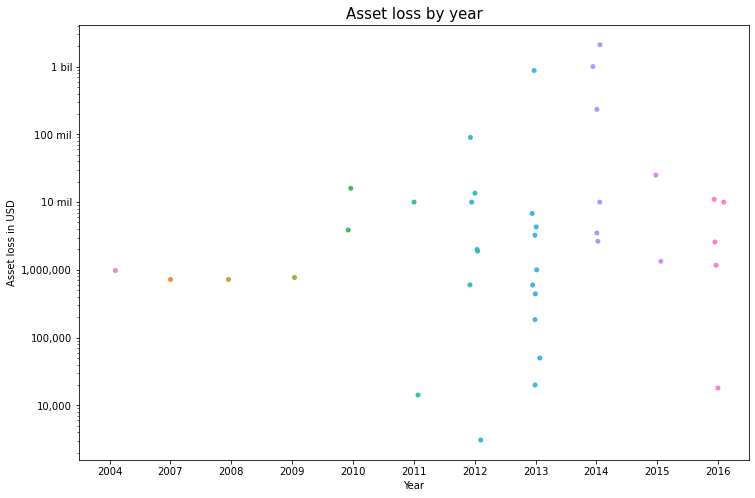

In [35]:
f,ax = plt.subplots(figsize=(12,8))

vis1 = combined_df[['Year','Asset loss in USD']]
vis1 = vis1[vis1['Year'].notnull() & vis1['Asset loss in USD'].notnull()]
vis1['Asset loss in USD'] = vis1['Asset loss in USD'].apply(lambda x: '%.f' % x)
vis1['Asset loss in USD'] = vis1['Asset loss in USD'].astype('int')
print('No. of data: ', len(vis1),'\n')

sb.stripplot(x='Year',y='Asset loss in USD',data=vis1)
ax.set(yscale="log")
ax.set_title('Asset loss by year',fontsize=15)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks().tolist())) # remove fixedformatter warning
ax.set_yticklabels(['0','0','10,000','100,000','1,000,000','10 mil','100 mil','1 bil','0','0'])

No. of data:  38 



[Text(0, 10.0, '0'),
 Text(0, 100.0, '0'),
 Text(0, 1000.0, '10,000'),
 Text(0, 10000.0, '100,000'),
 Text(0, 100000.0, '1,000,000'),
 Text(0, 1000000.0, '10 mil'),
 Text(0, 10000000.0, '100 mil'),
 Text(0, 100000000.0, '1 bil'),
 Text(0, 1000000000.0, '0'),
 Text(0, 10000000000.0, '0')]

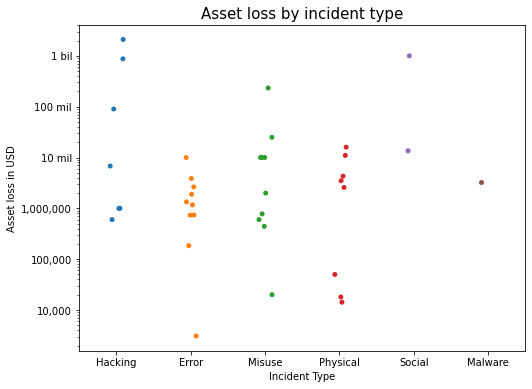

In [36]:
f,ax = plt.subplots(figsize=(8,6))
vis2 = combined_df[['Incident Type','Asset loss in USD']]
vis2 = vis2[vis2['Incident Type'].notnull() & vis2['Asset loss in USD'].notnull()]
vis2['Asset loss in USD'] = vis2['Asset loss in USD'].apply(lambda x: '%.f' % x)
vis2['Asset loss in USD'] = vis2['Asset loss in USD'].astype('int')
print('No. of data: ', len(vis2),'\n')

sb.stripplot(x='Incident Type',y='Asset loss in USD',data=vis2)
ax.set(yscale="log")
ax.set_title('Asset loss by incident type',fontsize=15)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks().tolist())) # remove fixedformatter warning
ax.set_yticklabels(['0','0','10,000','100,000','1,000,000','10 mil','100 mil','1 bil','0','0'])

No. of data:  22 



[Text(0, 100.0, '0'),
 Text(0, 1000.0, '0'),
 Text(0, 10000.0, '10,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 10000000.0, '10 mil'),
 Text(0, 100000000.0, '100 mil'),
 Text(0, 1000000000.0, '1 bil'),
 Text(0, 10000000000.0, '0')]

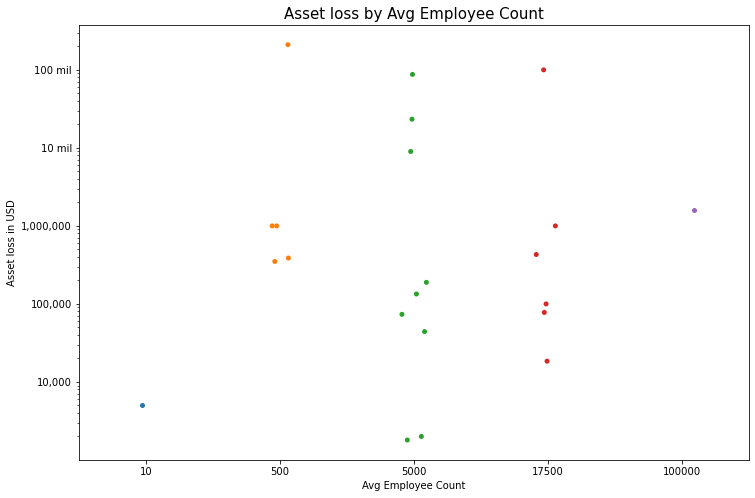

In [37]:
f,ax = plt.subplots(figsize=(12,8))
vis3 = combined_df[['Avg Employee Count','Asset loss in USD']]
vis3 = vis3[vis3['Avg Employee Count'].notnull() & vis3['Asset loss in USD'].notnull()]
vis3 = vis3[vis3['Avg Employee Count']!=0]
vis3['Asset loss in USD'] = vis3['Asset loss in USD'].apply(lambda x: '%.f' % x)
vis3['Asset loss in USD'] = vis3['Asset loss in USD'].astype('int')
print('No. of data: ', len(vis3),'\n')

sb.stripplot(x='Avg Employee Count',y='Asset loss in USD',data=vis3)
ax.set(yscale="log")
ax.set_title('Asset loss by Avg Employee Count',fontsize=15)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks().tolist())) # remove fixedformatter warning
ax.set_yticklabels(['0','0','10,000','100,000','1,000,000','10 mil','100 mil','1 bil','0'])

No. of data:  496 



Text(0.5, 1.0, 'Asset loss by incident type')

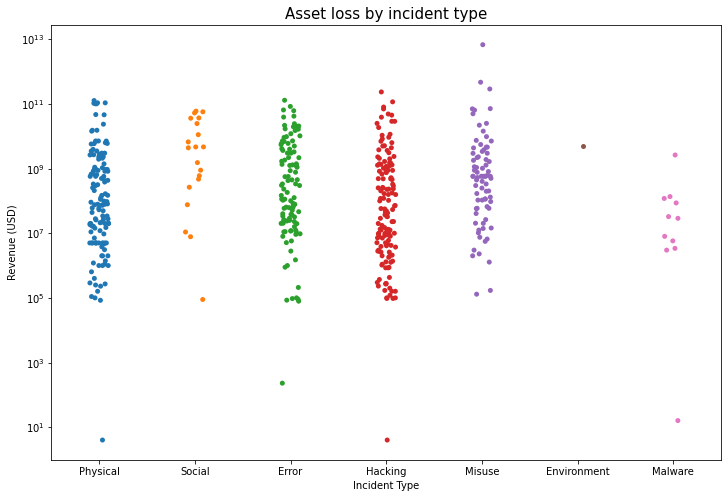

In [46]:
f,ax = plt.subplots(figsize=(12,8))
vis4 = combined_df[['Revenue (USD)','Incident Type']]
vis4 = vis4[vis4['Revenue (USD)'].notnull() & vis4['Incident Type'].notnull()]
vis4['Revenue (USD)'] = vis4['Revenue (USD)'].apply(lambda x: '%.f' % x)
vis4['Revenue (USD)'] = vis4['Revenue (USD)'].astype('int64')
print('No. of data: ', len(vis4),'\n')

sb.stripplot(x='Incident Type',y='Revenue (USD)',data=vis4)
ax.set(yscale="log")
ax.set_title('Asset loss by incident type',fontsize=15)

In [57]:
vis4[vis4['Revenue (USD)']<10000]

,Revenue (USD),Incident Type
2664,4,Hacking
3932,16,Malware
4155,230,Error
4319,4,Physical
